# dtwalign Tutorial 

Documentação: https://dtwalign.readthedocs.io/en/latest/tutorial.html

In [ ]:
# !pip install dtwalign

  Created wheel for dtwalign: filename=dtwalign-0.1.0-py3-none-any.whl size=11796 sha256=b18916a892313769ad044e25be51c2a242715009344550105b69548f0366e62b
  Stored in directory: /root/.cache/pip/wheels/7f/f0/63/db27d9dafbffd5317afee050333dafcb4da9560e992bacbb46
Successfully built dtwalign


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Basico

In [ ]:

np.random.seed(1234)
# generate toy data
x = np.sin(2 * np.pi * 3.1 * np.linspace(0, 1, 101))
x += np.random.rand(x.size)
y = np.sin(2 * np.pi * 3 * np.linspace(0, 1, 120))
y += np.random.rand(y.size)


fig = go.Figure()
fig.add_trace(go.Scatter(y=x, name='query'))
fig.add_trace(go.Scatter(y=y, name='referência'))
fig.show()

In [ ]:
from dtwalign import dtw
res = dtw(x, y) # computa a distancia DTW

In [ ]:
print(f"dtw distance: {res.distance}")
print(f"dtw normalized distance: {res.normalized_distance}")

dtw distance: 30.04881265458317
dtw normalized distance: 0.13596747807503698


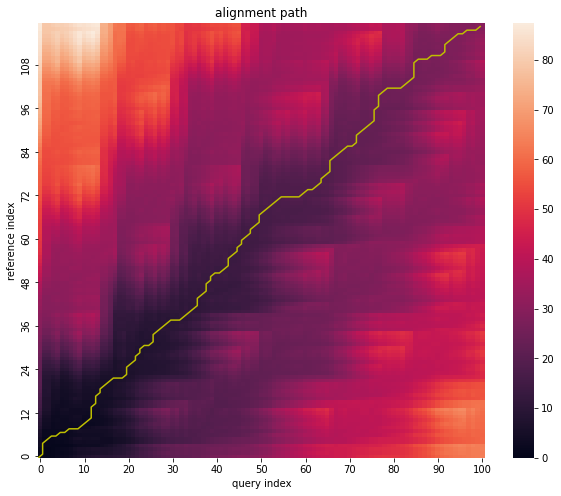

In [ ]:
# Visualização do caminho construído
plt.rcParams['figure.figsize'] = (10,8)
res.plot_path()

In [ ]:
# Recupera o caminho distorcido da query
x_warping_path = res.get_warping_path(target="query")

fig = go.Figure()
fig.add_trace(go.Scatter(y=x[x_warping_path], name='query alinhada'))
fig.add_trace(go.Scatter(y=y, name='referência'))
fig.show()

In [ ]:
# Recupera o caminho distorcido da referência
y_warping_path = res.get_warping_path(target="reference")

fig = go.Figure()
fig.add_trace(go.Scatter(y=x, name='query'))
fig.add_trace(go.Scatter(y=y[y_warping_path], name='referência alinhada'))
fig.show()

## Adicionando restrições

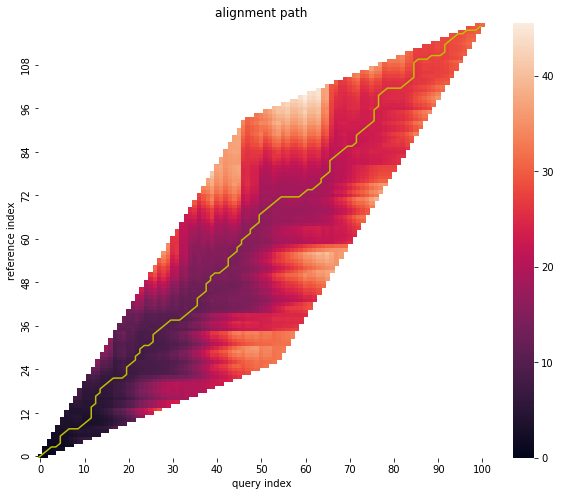

In [ ]:
# Adicionando a restrição da janela de itakura
res = dtw(x, y, window_type="itakura")
res.plot_path()

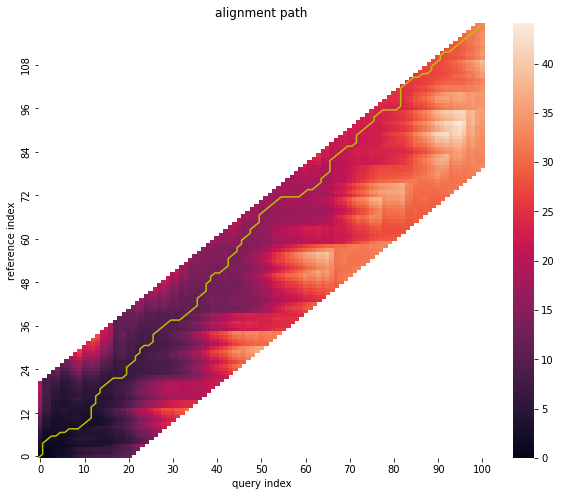

In [ ]:
# Adicionando a restrição da janela de sakoechiba, juntamente com o tamanho da janela
res = dtw(x, y, window_type="sakoechiba", window_size=20)
res.plot_path()

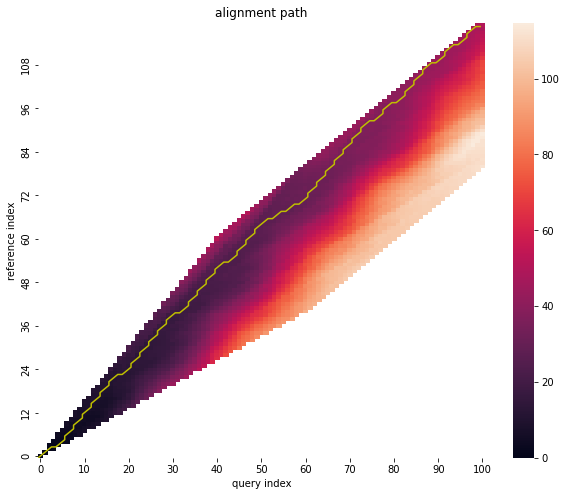

In [ ]:
# Alterando o step pattern utilizado na construição da matriz de distância acumulada
res = dtw(x, y, step_pattern="symmetricP2", window_type="sakoechiba", window_size=20) # -> window_type="sakoechiba", window_size=20
res.plot_path()

Veja mais opções de Step patterns em https://dtwalign.readthedocs.io/en/latest/modules/step_pattern.html

## Alinhamento parcial

In [ ]:
# Construção de duas novas séries temporais com tamanhos diferentes
x_partial = np.sin(2 * np.pi * 3 * np.linspace(0.3, 0.8, 100))
x_partial += np.random.rand(x_partial.size)
y_partial = np.sin(2 * np.pi * 3.1 * np.linspace(0, 1, 120))
y_partial += np.random.rand(y_partial.size)

fig = go.Figure()
fig.add_trace(go.Scatter(y=x_partial, name='query'))
fig.add_trace(go.Scatter(y=y_partial, name='referência'))
fig.show()

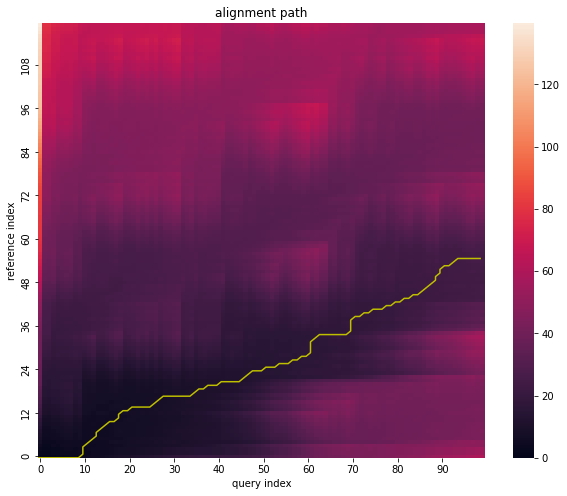

In [ ]:
# Abertura do final da matriz, permite que o alinhamento 
# termine antes da última amostra da referêcia
res = dtw(x_partial, y_partial, open_end=True)
res.plot_path()

## Matriz de distância pré-calculada

In [ ]:
# Calcula a matriz de distância do DTW previamente
from scipy.spatial.distance import cdist
X = cdist(x[:, np.newaxis], y[:, np.newaxis], metric="euclidean")

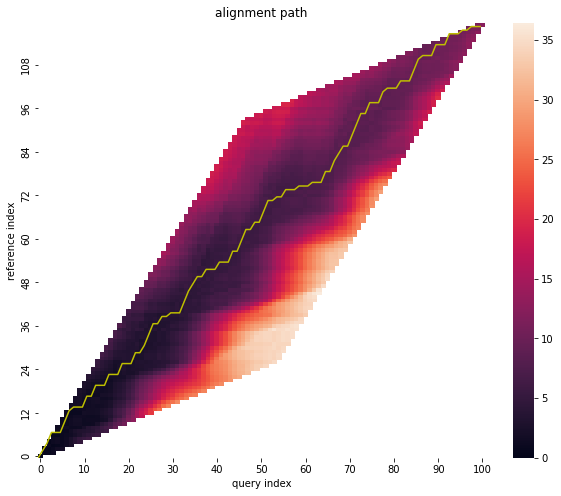

In [ ]:
from dtwalign import dtw_from_distance_matrix

# Calcula a distância DTW com um matriz de distância pré-calculada
res = dtw_from_distance_matrix(X, window_type="itakura", step_pattern="typeIVc")
res.plot_path()

## StepPattern e Window definida pelo usuário

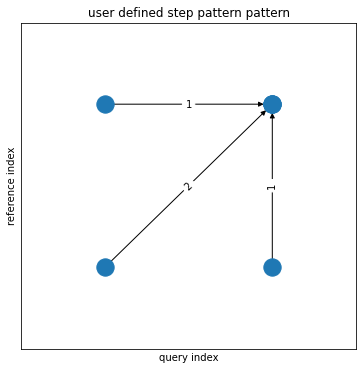

In [ ]:
from dtwalign.step_pattern import UserStepPattern

# Define um step-pattern customizado
pattern_info = [
                    dict(
                        indices=[(-1,0),(0,0)],
                        weights=[1]
                    ),
                    dict(
                        indices=[(-1,-1),(0,0)],
                        weights=[2]
                    ),
                    dict(
                        indices=[(0,-1),(0,0)],
                        weights=[1]
                    )
                ]
user_step_pattern = UserStepPattern(pattern_info=pattern_info,normalize_guide="N+M")

# plot
user_step_pattern.plot()

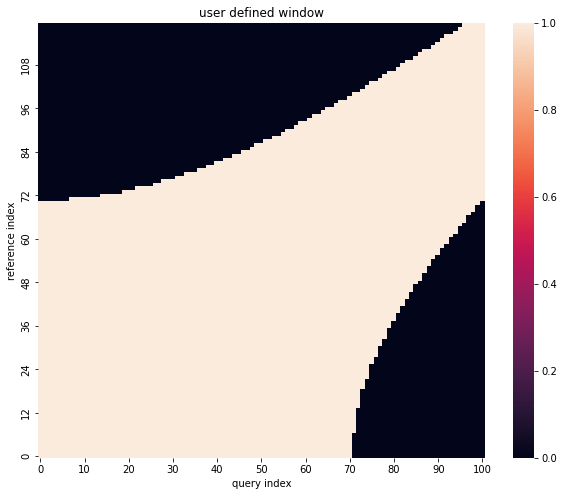

In [ ]:
from dtwalign.window import UserWindow

# Define uma janela de restrição customizado
user_window = UserWindow(X.shape[0], X.shape[1], win_func=lambda i, j: np.abs(i ** 2 - j ** 2) < 5000) # win_func -> bool

# plot
user_window.plot()

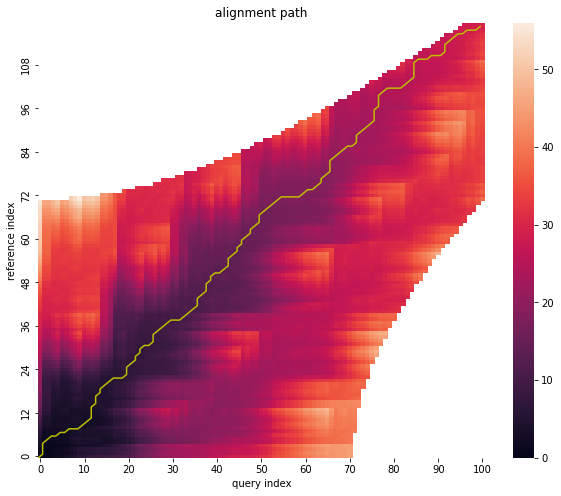

In [ ]:
from dtwalign import dtw_low

# Calcula a distância DTW utilizando a matriz de distância, 
# janela de restrição e step_pattern customizado
res = dtw_low(X,window=user_window,pattern=user_step_pattern)
res.plot_path()
